In [1]:
import yfinance as yf
import pandas as pd

In [46]:
index = yf.download(['^AXJO','^GSPC','000001.SS','^N225'],start='2021-10-20',end='2022-10-21')

[*********************100%***********************]  4 of 4 completed


In [2]:
china = pd.read_excel('Factor_Data/China.xlsx')

In [3]:
china['Ticker_s'].to_list()

['600519.SS',
 '601398.SS',
 '601939.SS',
 '300750.SZ',
 '601288.SS',
 '600941.SS',
 '601857.SS',
 '601988.SS',
 '600036.SS',
 '002594.SZ',
 '601318.SS',
 '601628.SS',
 '000858.SZ',
 '601088.SS',
 '600900.SS',
 '600028.SS',
 '300999.SZ',
 '600938.SS',
 '300760.SZ',
 '601658.SS',
 '601012.SS',
 '601888.SS',
 '601728.SS',
 '601166.SS',
 '603288.SS',
 '600809.SS',
 '601328.SS',
 '000333.SZ',
 '002415.SZ',
 '002714.SZ',
 '000568.SZ',
 '600309.SS',
 '600276.SS',
 '688235.SS',
 '002352.SZ',
 '600030.SS',
 '300059.SZ',
 '601816.SS',
 '300015.SZ',
 '603259.SS',
 '000001.SZ',
 '300122.SZ',
 '002304.SZ',
 '600438.SS',
 '601668.SS',
 '601225.SS',
 '600690.SS',
 '601899.SS',
 '600000.SS',
 '002475.SZ',
 '600048.SS',
 '601998.SS',
 '601319.SS',
 '300274.SZ',
 '600887.SS',
 '600188.SS',
 '002142.SZ',
 '601633.SS',
 '000002.SZ',
 '300014.SZ',
 '601919.SS',
 '600905.SS',
 '600406.SS',
 '601601.SS',
 '601138.SS',
 '300124.SZ',
 '600104.SS',
 '000651.SZ',
 '688223.SS',
 '688271.SS',
 '601066.SS',
 '6004

In [8]:
china_add = yf.download(china['Ticker_s'].to_list(),start='2022-10-21',end='2022-10-21')

[*********************100%***********************]  500 of 500 completed


In [10]:
china_add['Adj Close']

,000001.SZ,000002.SZ,000009.SZ,000039.SZ,000063.SZ,000066.SZ,000069.SZ,000100.SZ,000157.SZ,000166.SZ,...,688516.SS,688536.SS,688538.SS,688561.SS,688599.SS,688728.SS,688777.SS,688779.SS,688819.SS,900948.SS
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-20,11.2,16.120001,12.27,7.36,22.040001,10.45,4.71,4.27,5.63,3.95,...,338.320007,271.809998,2.65,49.32,63.209999,16.6,84.629997,15.46,39.75,1.608


In [11]:
china_add['Adj Close'].to_excel('china_add.xlsx')

In [47]:
index = index['Adj Close']

In [48]:
index_1 = (index[1:].pct_change()+1).cumprod()

In [51]:
index_1.iloc[0,:] = 1

In [53]:
index_1.to_csv('benchmarks.csv')

In [11]:
us_rank = pd.read_excel('Factor_Ranking/US_rank.xlsx',index_col='Ticker')
us_price = pd.read_excel('US_stock.xlsx',index_col='Date')

In [66]:
benchmarks = pd.read_csv('benchmarks.csv',index_col='Date')


In [69]:
benchmarks.index

Index(['10/20/21', '10/21/21', '10/22/21', '10/25/21', '10/26/21', '10/27/21',
       '10/28/21', '10/29/21', '11/1/21', '11/2/21',
       ...
       '10/7/22', '10/10/22', '10/11/22', '10/12/22', '10/13/22', '10/14/22',
       '10/17/22', '10/18/22', '10/19/22', '10/20/22'],
      dtype='object', name='Date', length=262)

In [70]:
temp.index

DatetimeIndex(['2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-11-02',
               ...
               '2022-10-06', '2022-10-07', '2022-10-10', '2022-10-11',
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-17',
               '2022-10-18', '2022-10-19'],
              dtype='datetime64[ns]', name='Date', length=504, freq=None)

In [68]:
pd.concat([temp['2021-10-20':],benchmarks],axis=1)

,0,China,Australia,USA,Japan
Date,,,,,
2021-10-20 00:00:00,3.189070,NaN,NaN,NaN,NaN
2021-10-21 00:00:00,3.177066,NaN,NaN,NaN,NaN
2021-10-22 00:00:00,3.176728,NaN,NaN,NaN,NaN
2021-10-25 00:00:00,3.236421,NaN,NaN,NaN,NaN
2021-10-26 00:00:00,3.230245,NaN,NaN,NaN,NaN
...,...,...,...,...,...
10/14/22,NaN,0.856423,0.911663,0.789885,0.926004
10/17/22,NaN,0.860033,0.898930,0.810802,0.915238
10/18/22,NaN,0.858924,0.914415,0.820067,0.928239


In [56]:
temp = (us_price[us_rank['Momentum'].sort_values()[0:30].index].pct_change().mean(axis=1)+1).cumprod()
# temp = pd.DataFrame(temp,columns=[f'{Factor}_{Num}'])
# temp.index = us_price['Date']
# temp.iloc[0,0] = 1

In [62]:
temp = (us_price.loc['2021-10-20':,us_rank['Momentum'].sort_values()[0:30].index].pct_change().mean(axis=1)+1).cumprod()
temp.iloc[0] = 1

In [29]:
# us_rank = pd.read_excel('Factor_Ranking/US_rank.xlsx',index_col='Ticker')
# aus_rank = pd.read_excel('Factor_Ranking/US_rank.xlsx',index_col='Ticker')
# china_rank = pd.read_excel('Factor_Ranking/China_rank.xlsx',index_col='Ticker')
# japan_rank = pd.read_excel('Factor_Ranking/Japan_rank.xlsx',index_col='Ticker')

# us_price = pd.read_excel('US_stock.xlsx',index_col='Date')
# aus_price = pd.read_excel('US_stock.xlsx',index_col='Date')
# china_price = pd.read_excel('China_stock.xlsx',index_col='Date')
# japan_price = pd.read_excel('Japan_stock.xlsx',index_col='Date')

rank_dict = {
  "USA": pd.read_excel('Factor_Ranking/China_rank.xlsx',index_col='Ticker'),
  "Australia": pd.read_excel('Factor_Ranking/Japan_rank.xlsx',index_col='Ticker')
#   "China": china_rank,
#   "Japan": japan_rank
}

# price_dict = {
#   "USA": us_price,
#   "Australia": aus_price,
#   "China": china_price,
#   "Japan": japan_price
# }

In [31]:
rank_dict['USA']

,Momentum,Value,Profitability
Ticker,,,
2176,1,407,58
2192,2,481,78
601127,3,342,495
603260,4,315,18
300390,5,318,27
...,...,...,...
600521,452,330,215
300832,453,445,41
876,454,24,492


In [26]:
china_rank = pd.read_excel('Factor_Ranking/China_rank.xlsx',index_col='Ticker',dtype={'Ticker': object})


In [20]:
rank_dict['USA']['Value'].sort_values()[0:30].index

Index(['PARA', 'CAH', 'GM', 'WBD', 'DELL', 'HPE', 'F', 'HPQ', 'AIG', 'COF',
       'DHI', 'C', 'RKT', 'BG', 'ET', 'LEN', 'DINO', 'TECK', 'WLK', 'T', 'AER',
       'TSN', 'BA', 'L', 'SYF', 'EXC', 'PFG', 'HIG', 'LYB', 'PRU'],
      dtype='object', name='Ticker')

In [25]:
Aus = pd.read_excel('Factor_Data/Aus.xlsx')
Aus_list = [i+'.AX' for i in Aus['Ticker_s']]
Aus_prices = yf.download(Aus_list,start='2020-10-21',end='2022-10-21')
Aus_prices = Aus_prices['Adj Close'][:-1]
Aus_prices.columns = [i[:-3] for i in Aus_prices.columns]
Aus_prices.to_excel('Aus_stock.xlsx')

In [54]:
US = pd.read_excel('Factor_Data/US.xlsx')
US_list = US['Ticker_s'].to_list()
US_prices = yf.download(US_list,start='2020-10-21',end='2022-10-21')
US_prices = US_prices['Adj Close'][:-1]
US_prices.to_excel('US_stock.xlsx')

In [65]:
Japan = pd.read_excel('Factor_Data/Japan.xlsx')
Japan_list = [i+'.T' for i in Japan['Ticker_s'].astype('str')]
Japan_prices = yf.download(Japan_list,start='2020-10-21',end='2022-10-21')
Japan_prices = Japan_prices['Adj Close'][:-1]
Japan_prices.columns = [i[:-2] for i in Japan_prices.columns]
Japan_prices.to_excel('Japan_stock.xlsx')

In [70]:
China = pd.read_excel('Factor_Data/China.xlsx')
China_list = China['Ticker_s'].to_list()
China_prices = yf.download(China_list,start='2020-10-21',end='2022-10-21')


[*********************100%***********************]  500 of 500 completed


In [72]:
China_prices = China_prices['Adj Close'][:-1]
China_prices.columns = [i[:-3] for i in China_prices.columns]
China_prices.to_excel('China_stock.xlsx')

In [5]:
# index_list = ['^AXJO','^GSPC','^HSI']
# df = yf.download(index_list,start='1982-01-01',end='2022-10-21')
# df = df['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [80]:
pd.DataFrame(US_prices.mean(axis=1),columns=['Momentum_30'])

,f
Date,
2020-10-20,791.506525
2020-10-21,789.215133
2020-10-22,795.096191
2020-10-23,799.386506
2020-10-26,782.735909
...,...
2022-10-13,989.073369
2022-10-14,978.835233
2022-10-17,996.768405


In [21]:
# df.to_csv('index.csv',index=True)

<AxesSubplot:xlabel='Date'>

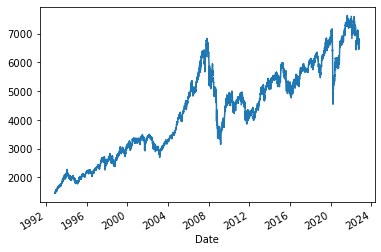

In [22]:
df['^AXJO'].plot()

In [16]:
# from dash import Dash, dcc, html, Input, Output
# import plotly.express as px
# import pandas as pd

SyntaxError: invalid syntax (4278715877.py, line 1)

In [13]:


# app = Dash(__name__)

# df = pd.read_csv('stocks_long.csv')
# df['Date'] = pd.to_datetime(df['Date'], format = "%d/%m/%Y")
# df['Year'] = pd.DatetimeIndex(df['Date']).year

# app.layout = html.Div([
#     html.H1(
#             'Stock Index Price'
#             ),
#     html.Div([
#             dcc.Dropdown(
#                 index_list,value = '^AXJO',id='stock_index'
#             ),
#         ], style={'width': '48%', 'display': 'inline-block'}),
#     html.H3(
#         # Header 3
#     ),

#     dcc.Graph(
#         id='graph'
#     )
# ])


# @app.callback(
#      Output('graph', 'figure'),
#      Input('stock_index', 'value')
#     )
# def update_graph(stock_index):
#     filtered_df = df[stock_index]

# #     companies = {
# #         "^AXJO" : "Facebook",
# #         "^GSPC" : "Google",
# #         "^HSI" : "Microsoft"
# #         }
        
# #     full_name = companies[stock_symbol_name]

#     fig = px.line(
#         data_frame = filtered_df,
#         x = filtered_df.index,
#         y = stock_index)
# #         title = f'{indicator_type_name.title()} for {full_name}')

# #     header3 = f'Data for {full_name} in {year_value}'
#     return fig#, header3


# if __name__ == '__main__':
#     app.run_server(debug=True,mode='jupyterlab')


ContextualVersionConflict: (MarkupSafe 2.0.1 (/opt/anaconda3/envs/Newpython/lib/python3.10/site-packages), Requirement.parse('MarkupSafe>=2.1.1'), {'Werkzeug'})

In [ ]:
# https://dash-demo.plotly.host/portfolio-app/?_gl=1*alym0p*_ga*MTk1NzQ0MTM3MC4xNjY2MDU5MDY3*_ga_6G7EE0JNSC*MTY2NjMwNzE5Mi4zLjEuMTY2NjMwNzI1MS4wLjAuMA..

# https://github.com/plotly/dash-sample-apps

# https://github.com/plotly/dash-sample-apps/blob/main/apps/dash-financial-report/app.py

In [89]:
df = pd.read_excel('Factor_Data/US.xlsx',index_col='Ticker_s')
stock_price = pd.read_excel('US_stock.xlsx')

In [84]:
temp = pd.DataFrame(stock_price[().to_list()].mean(axis=1),columns=[f'{Factor}_{Num}'])

KeyError: "None of [Int64Index([125, 319, 380, 381, 119, 172,  62, 158,  14, 279, 212, 406, 481,\n             21,  51, 442, 171, 236, 336, 373,  36, 139, 122, 107, 128, 121,\n            383, 255, 472, 178],\n           dtype='int64')] are in the [columns]"

In [105]:
temp = pd.DataFrame((stock_price[df['Momentum' + ' Rank'].sort_values()[0:30].index].pct_change().mean(axis=1)+1).cumprod())
temp.iloc[0,0] = 1

In [107]:
df['Momentum' + ' Rank'].sort_values()

Ticker_s
CEG       1
EQT       2
OXY       3
CF        4
ENPH      5
       ... 
COIN    496
SHOP    497
TWLO    498
SE      499
SNAP    500
Name: Momentum Rank, Length: 500, dtype: int64

In [109]:
(stock_price[df['Momentum' + ' Rank'].sort_values()[0:30].index].pct_change().mean(axis=1)+1).cumprod()

0           NaN
1      0.981142
2      1.012893
3      1.015340
4      0.979416
         ...   
499    3.358195
500    3.227375
501    3.283855
502    3.320078
503    3.353364
Length: 504, dtype: float64

In [113]:
temp

,0
0,1.000000
1,0.981142
2,1.012893
3,1.015340
4,0.979416
...,...
499,3.358195
500,3.227375
501,3.283855
502,3.320078


In [115]:
temp.index = stock_price['Date']

In [116]:
temp

,0
Date,
2020-10-20,1.000000
2020-10-21,0.981142
2020-10-22,1.012893
2020-10-23,1.015340
2020-10-26,0.979416
...,...
2022-10-13,3.358195
2022-10-14,3.227375
2022-10-17,3.283855
